# Гравиметры

## Маятниковые гравиметры абсолютных измерений

Измерение абсолютного значения силы тяжести основаны на том, что период колебаний \\( T \\) у маятника зависит от величины поля, в котором совершаются эти колебания. Математическим аппаратом, описывающим данную зависимость, является формула: 

$$ T = 2\pi\sqrt{\frac{l}{g}} $$

Однако на точность вычислений силы тяжести, в результате, будут оказывать влияние точность измерения длины маятника, а также масса груза. Для решения этой проблемы Ф. В. Бессель предложил измерять периоды колебаний \\( T_1 \\) и \\( T_2 \\) одного и того же маятника при разной длине нити \\( l_1 \\) и \\( l_2 \\). Для расчётов необходимо использовать формулу:

$$ g = 4\pi^2\frac{l_1-l_2}{T^2_1-T^2_2} $$

Преимущество данного подхода заключается в том, что измерить разность длин маятников можно значительно точнее и проще, чем сами длины маятников. Точность измерения может составить 0,3 мГал.

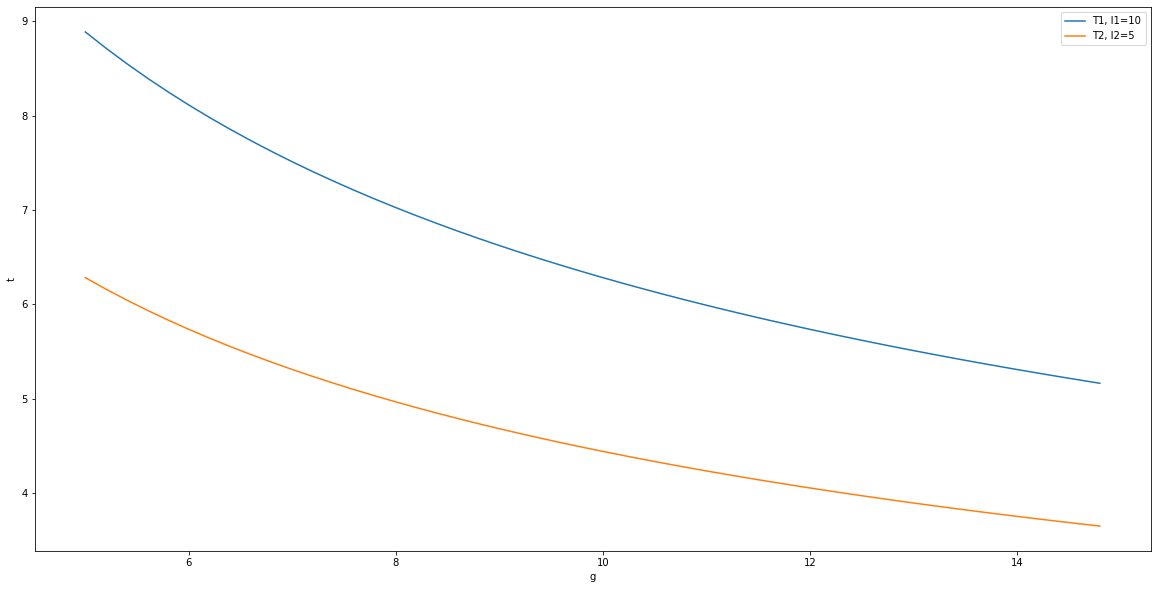

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sage

def rangeT(l):
    t = np.arange(5,15,0.2)
    T = []
    for i in t:
        T.append(2*np.pi * np.sqrt(l/i))
    return T

def rangeG(l1,l2,T1, T2):
    g = []
    for i in range(len(T1)):
        g.append((4*(np.pi**2) * (l1-l2))/((T1[i]*T1[i]) - (T2[i]*T2[i])))
    return g

nano = 10**(-7)
alpha = 380 * nano
l1 = 10
l2 = 5

T1 = rangeT(l1)
T2 = rangeT(l2)
g = rangeG(l1,l2,T1,T2)

#T1 = 2*np.pi * np.sqrt(l1/g)
#T2 = 2*np.pi * np.sqrt(l2/g)
#g = (4*(np.pi**2) * (l1-l2))/((T1*T1) - (T2*T2))
plt.figure(figsize=(20, 10))
p1, = plt.plot(g,T1)
p2, = plt.plot(g,T2)
plt.legend([p1,p2],['T1, l1=10','T2, l2=5'])
plt.ylabel('t')
plt.xlabel('g')
plt.show()

График зависимости колебаний от силы притяжения.

## Баллистические гравиметры

Измерение абсолютного значения силы тяжести основано на регистрации времени свободного падения некоторого пробного тела известной массы. Математическим аппаратом, описывающим данную зависимость, является формула:

$$ z = z_0 + v_0t + \frac{gt^2}{2}$$

Величины \\( z_0 \\) — начальная высота, \\( v_0 \\) — начальная скорость заранее известны, соответственно, измерив положение тела \\( z \\) и время \\( t \\) в нескольких положениях, можно составить систему уравнений:

\begin{cases}
    z_1 = z_0 + v_0t_1 + \frac{gt_1^2}{2}\\
    z_2 = z_0 + v_0t_2 + \frac{gt_2^2}{2}\\
    z_3 = z_0 + v_0t_3 + \frac{gt_3^2}{2}
\end{cases}

Измерения координаты тела осуществляется с помощью лазерного дальномера, а для увеличения точности вводят поправку на время запаздывания определения координат из-за физических процессов в приборе.

Для ещё большего увеличения точности могут усложнять математический аппарат, учитывая неоднородность самого гравитационного поля (свободно падающий груз меняет свою абсолютную высоту, а на разной высоте разное нормальное значения силы тяжести). Поэтому на практике распространена следующая формула:

$$ z_i = z_0 + v_0t_i + \frac{gt_i^2}{2} + \frac{gt_i^3}{6} + \frac{gt_i^4}{24}$$

где \\( \gamma \\) — вертикальный градиент силы тяжести на текущем пикете.

Фактически, в гравиметрах типа ГАБЛ-Э во время одного свободного падения измерений производят не три раза, а несколько сотен раз. Это позволяет статистическими методами определить наиболее вероятное значение силы тяжести. Для этого применяется следующая формула:

$$g = \frac{2}{\Delta}
\begin{vmatrix}
  N & \sum{t_i} & \sum{S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)} \\
  \sum{t_i} & \sum{t_i^2} & \sum{[S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)]t_i} \\
  \sum{t_i^2} & \sum{t_i^3} & \sum{[S_i - \frac{1}{6}\gamma(v_0t_i^3 + \frac{1}{4}gt_i^4)]t_i^2}
 \end{vmatrix}
$$

где \\( N \\) — количество измерений, а величина \\( \Delta \\)  определяется выражением:

$$\Delta = 
\begin{vmatrix}
  N & \sum{t_i} & \sum{t_i^2} \\
  \sum{t_i} & \sum{t_i^2} & \sum{t_i^3} \\
  \sum{t_i^2} & \sum{t_i^3} & \sum{t_i^4}
 \end{vmatrix}
$$

Визуально основная часть гравиметра представляет собой короткую трубку, из которой откачан воздух. Специальный механизм сверху вниз по трубке бросает шарик известной массы, а нижний механизм (так называемая «юбка») ловит шарик внизу, когда тот вылетает из трубки. Затем механизм возвращает шарик обратно к верхней части трубы и снова бросает. Во время падения лазерный луч многократно измеряет координаты шарика в трубе.

## Решение прямой задачи в общем виде

Аномалии силы тяжести, вызванные притяжением тел известной формы, размера и избыточной плотности, рассчитывают на основе закона всемирного тяготения (закона Ньютона). Для этого гравитирующее тело разбивают на элементарные массы \\( dm \\); рассчитывают аномалию такой точечной массы \\( \Delta g_1 \\), которая равна вертикальной составляющей силы ньютоновского притяжения \\( F_1 \\) этой массой массы 1 г, находящейся в точке наблюдения \\( A \\), т. е. берут составляющую силы притяжения по направлению действия силы тяжести Земли \\( g \\); наконец, используя принцип суперпозиции, определяют аномалию за счет притяжения всем телом \\( \Delta g_T \\), как сумму притяжении всех элементарных точечных масс, которыми можно представить аномалообразующее тело.

Математически сказанное можно записать так. Согласно выражению \\( F_1 = G\frac{dm}{r^2}\\) , \\( \Delta g_1 = F_1 \cdot cos\alpha = G \cdot dm\frac{\bar z-z}{r^2} \\) ,где 
$$ cos\alpha = \frac{\bar z-z}{r}, r=\sqrt{(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2} $$ - расстояние между точкой наблюдения \\(А (х, у, z)\\) и точкой \\(M( x,y,z )\\), в которой находится элементарная точечная масса. В природных условиях аномальные включения с плотностью \\(\sigma\\) находятся во вмещающей среде с плотностью \\(\sigma_0\\), поэтому под массой \\(dm\\) надо понимать избыточную массу \\(dm = (\sigma — \sigma_0) \space dV =\Delta\sigma \space dV\\), где \\(dV\\)—элементарный объем точечной массы; \\(\Delta\sigma\\) — избыточная плотность. Поэтому окончательные выражения для расчета аномалии силы тяжести точечной массы и тела, используемые в теории гравиразведки, имеют вид
$$\Delta g_1=G \cdot \Delta\sigma\frac{\bar z - z}{r^3} dV, \Delta g_T= \int_v \frac{\Delta\sigma(\bar z - z)dV}{[(\bar x-x)^2+(\bar y-y)^2+(\bar{z}-z)^2]^\frac{3}{2}}$$ Уравнение 1.1

Интеграл в последней формуле берут по всему объему тела \\(V\\). При \\(\sigma > \sigma_0 \space \Delta g_T\\) имеет положительный знак, т. е. наблюдаются увеличение притяжения и положительные аномалии. При \\(\sigma < \sigma_0 \space \Delta g_T\\) имеет отрицательный знак, т. е. наблюдаются уменьшение притяжения и отрицательные аномалии.



## Прямая задача для шара

Пусть однородный шар радиусом \\(R\\), объемом \\(V\\), с избыточной плотностью \\(\Delta\sigma\\) расположен на оси \\(Z\\) на глубине \\(h\\), а). Решим прямую задачу, т. е. определим гравитационный эффект вдоль наземного профиля \\(ОХ\\), проходящего через проекцию центра шара с началом координат над ним. Поскольку по закону всемирного тяготения шар притягивается с такой же силой, как точечная масса, сосредоточенная в его центре, аномалию над шаром Δgш можно получить без решения интеграла, считая, что аномалия силы тяжести над шаром и аномалия точечной массы, помещенной в его центре, совпадают:

$$\Delta g_ш = \Delta g_1 = G \cdot \Delta\sigma \cdot V\frac{h}{r^3} = \frac{GMh}{(x^2+h^2)^{3/2}}$$

где \\(M= Δσ V\\) —избыточная масса шара. График \\(\Delta g_ш\\) будет иметь максимум над центром шара \\(\Delta g_{max} = \frac{GM}{h^2}\\) (при х=0) и асимптотически стремиться к нулю при \\(х → ± ∞\\). Знак \\(\Delta g_ш\\) определяется знаком \\(\Delta\sigma\\). Формула для второй производной потенциала или горизонтального градиента силы тяжести получает вид:

$$W_{xz} = 	\frac{\partial(\Delta g_ш)}{\partial x} = GMh \cdot \frac{\partial (l/r^3)}{\partial x} = -\frac{3GMhx}{r^5} = -\frac{3GMhx}{(x^2+h^2)^{5/2}}$$

График \\(W_{XZ}\\) имеет перед шаром максимум \\((х<0)\\), а за шаром — минимум \\((x>0)\\).
Над центром шара \\(W_{XZ}=0\\). Если провести расчеты, например, \\(\Delta g_ш\\) по ряду профилей, то очевидно, что карта аномалий \\(\Delta g_ш\\) будет иметь вид концентрических окружностей с центром над шаром.

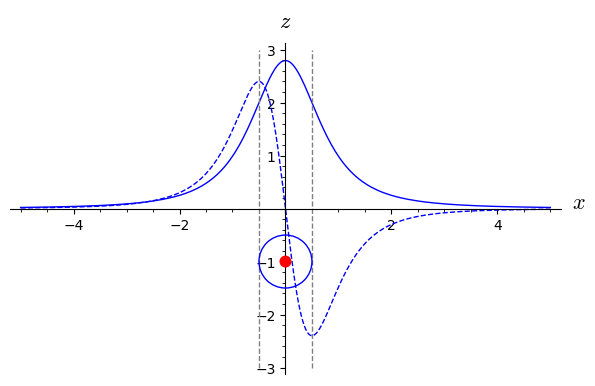

In [2]:
from sage.plot.circle import Circle

def gBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return (G*M*h)/((x**2 + h**2)**(3/2))

def wBall(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return -(3*G*M*h*x)/((x**2 + h**2)**(5/2))

g1 = Graphics()
var('x y z')
g1+= plot(gBall(x),(x,-5,5))
g1+= plot(wBall(x),(x,-5,5),linestyle = "--")
g1+= circle((0,-1),0.5)
g1+= circle((0,-1),0.1,fill=True, color = 'red')
g1+= line([(0.5,-3),(0.5,3)],linestyle = "--", color = 'gray')
g1+= line([(-0.5,-3),(-0.5,3)],linestyle = "--", color = 'gray')
g1.axes_labels(['$x$','$z$'])
g1

## Прямая задача для горизонтального кругового цилиндра

Пусть горизонтальный бесконечно длинный круговой цилиндр радиуса \\(R\\), сечения \\(s\\), с избыточной плотностью \\(\Delta\sigma\\) расположен вдоль оси \\(Y\\) на глубине \\(h\\). Решим прямую задачу, т. е. определим \\(\Delta g_гц\\) и \\(W_{XZ}\\) вдоль оси \\(X\\), направленной вкрест простирания цилиндра с началом координат над его центром. Притяжение цилиндром будет таким же, как притяжение вещественной линии, расположенной вдоль его оси с массой единицы длины \\(dm = \pi R2\\) \\(\Delta\sigma dy\\). Поэтому для точек наблюдения вдоль оси \\(X (y=z=0)\\) с учетом, что \\(х=0\\), \\(-\infty< y < \infty \\)(цилиндр считается бесконечно длинным), \\(z=h\\), аналитическое выражение можно получить из уравнения 1.1:

$$\Delta g_гц = G\Delta\sigma R^2\int^{+\infty}_{-\infty}\frac{dy}{(x^2+y^2+h^2)^{3/2}} = \frac{2GM_1 h}{x^2+h^2}$$

где \\(M_1 = \pi R^2\Delta\sigma\\) — избыточная масса единицы длины цилиндра. График \\(\Delta g_{гц}\\) будет иметь максимум \\(\Delta g_{max} = \frac{2GM_1}{h}\\) (при \\(х=0\\) и, как и \\(\Delta g_ш\\), асимптотически стремиться к нулю при \\(х → ± \infty\\). Очевидно, что в плане изолинии \\(\Delta g_{гц}\\) будут представлять систему параллельных оси цилиндра линий. В целом график \\(\Delta g_{гц}\\) и \\(W_{XZ}\\) вдоль оси \\(X\\) будет примерно таким же, как и над шаром.

$$W_{xz} = 	\frac{\partial(\Delta g_{гц})}{\partial x} = -\frac{4GMhx}{(x^2+h^2)^2}$$

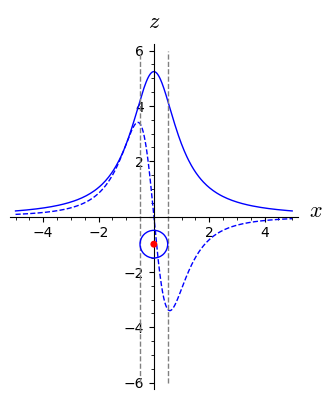

In [3]:
def gCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return (2*G*M*h)/((x**2 + h**2))

def wCylinder(x):
    G = 6.67#*10**(-11)
    r = 0.5
    p = 0.5
    M = p*np.pi*r**2
    h = 1
    return -(4*G*M*h*x)/((x**2 + h**2)**(2))

g2 = Graphics()
var('x y z')

g2+= plot(gCylinder(x),(x,-5,5))
g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--")
#g1+= plot(gBall(y),(y,-5,5))
g2+= circle((0,-1),0.5)
g2+= circle((0,-1),0.1,fill=True, color = 'red')
g2+= line([(0.5,-6),(0.5,6)],linestyle = "--", color = 'gray')
g2+= line([(-0.5,-6),(-0.5,6)],linestyle = "--", color = 'gray')
g2.axes_labels(['$x$','$z$'])
g2

## Прямая задача для вертикального уступа

Под вертикальным уступом в теории интерпретации гравитационных аномалий понимают горизонтальный полупласт, ограниченный вертикальной гранью, бесконечного простирания по оси \\(Y\\). Плотность пород уступа и вмещающих пород различна и составляет постоянную и отличную от нуля величину \\(\Delta\sigma\\). Если глубину верхней горизонтальной плоскости, ограничивающей полупласт, обозначить \\(h1\\), нижней — \\(h2\\), а боковую вертикальную грань совместить с осью \\(Z\\), то гравитационное поле \\(g_у\\) в точках \\(x\\) (вдоль оси \\(Х\\) при \\(z=0\\) и \\(y=0\\)) соответствует выражению 1.1 при определенных пределах интегрирования:

$$\Delta g_у(x) = G\Delta\sigma\pi \int_{0}^{\infty} \int_{-\infty}^{+\infty} \int_{h_1}^{h_2} \frac{\bar zd \bar xd \bar yd \bar z}{[(\bar x - x)^2 + \bar y^2 + \bar z^2]^{3/2}} = G\Delta\sigma\{ \bar xln\frac{x^2+h_2^2}{x^2+h_1^2} + \pi(h_2-h_1) + 2h_2arctg\frac{x}{h_2} - 2h_1arctg\frac{x}{h_1} \}$$

При \\(х → ± \infty\\) значения \\(\Delta g\\) выходят на горизонтальные асимптоты с максимальной аномалией \\(\Delta g_{max} = 2\pi G\Delta\sigma\Delta h\\). Над самим вертикальным сбросом (при \\(х=0\\)) получаем \\(\Delta g = (1/2)\\) \\(\Delta g_{max} = \pi G \Delta\sigma\Delta h\\). Очевидно, на карте \\(\Delta g_у\\) будут наблюдаться параллельные изолинии с максимальным сгущением изолиний над вертикальной гранью.

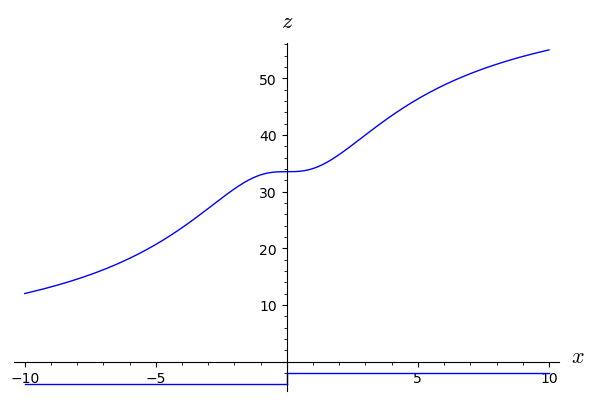

In [4]:
def gStep(x):
    G = 6.67#*10**(-11)
    p = 0.8
    x1 = 0
    h1 = 2
    h2 = 4
    return (G*p*(x1*np.log((x**2+h2**2)/(x**2+h1**2))+np.pi*(h2-h1)+2*h2*np.arctan(x/h2)-2*h1*np.arctan(x/h1)))

g3 = Graphics()
var('x y z')

g3+= plot(gStep(x),(x,-10,10))
#g2+= plot(wCylinder(x),(x,-5,5),linestyle = "--", color = 'grey')
#g1+= plot(gBall(y),(y,-5,5))
g3+= line([(0,-2), (10,-2)])
g3+= line([(0,-2), (0,-4)])
g3+= line([(0,-4), (-10,-4)])
#g3+= circle((0,-1),0.1,fill=True, color = 'red')
g3.axes_labels(['$x$','$z$'])
g3

Все графики увеличены для наглядности в \\(10^{11}\\) раз. Пример влияния шара плотность 0,8 и радиусом 0,5 без увеличения:

2.79392306659252e-11


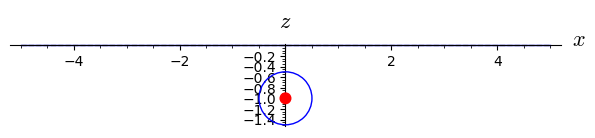

In [5]:
def gTrueBall(x):
    G = 6.67*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return (G*M*h)/((x**2 + h**2)**(3/2))

def wTrueBall(x):
    G = 6.67*10**(-11)
    r = 0.5
    p = 0.8
    M = p*(4/3)*np.pi*r**3
    h = 1
    return -(3*G*M*h*x)/((x**2 + h**2)**(5/2))

g4 = Graphics()
var('x y z')
print(gTrueBall(0))
g4+= plot(gTrueBall(x),(x,-5,5))
g4+= plot(wTrueBall(x),(x,-5,5),linestyle = "--", color = 'grey')
g4+= circle((0,-1),0.5)
g4+= circle((0,-1),0.1,fill=True, color = 'red')
g4.axes_labels(['$x$','$z$'])
g4

## Класс матрицы

In [6]:
import numpy.linalg as linalg

class Matrix:           
    def __init__(self, arr):
        self.n = len(arr)
        self.m = len(arr[0])
        self.arr = arr
        
    def transpose(self):
        lst = np.zeros((self.m,self.n))
        for i in np.arange(len(lst)):
            for j in np.arange(len(lst[0])):
                lst[i][j] = self.arr[j][i]
        return Matrix(lst)
    
    
    def my_LU(self,b):     
        L  = np.zeros((self.n,self.n))
        U = np.copy(self.arr)
        
        for i in np.arange(self.n):
            for j in np.arange(i,self.n):
                L[j][i]=U[j][i]/U[i][i]
                
        for k in np.arange(1,self.n):
            for i in np.arange(k-1,self.n):
                for j in np.arange(i,self.n):
                    L[j][i]=U[j][i]/U[i][i]
                    
            for i in np.arange(k,self.n):
                for j in np.arange(k-1,self.n):
                    U[i][j]=U[i][j]-L[i][k-1]*U[k-1][j]
        
        #print(L)
        #print("-"*40)
        #print(U)
        #print(np.dot(L,U))
        
        return Matrix(L),Matrix(U)      
    
    
    def LUinv(self):
        A = Matrix(np.zeros((self.n,self.m)))
        #L = self.get_L()
        #U = self.get_U()
        L,U = self.my_LU(self.arr)
        for i in np.arange(self.n):
            Ei = Matrix(np.zeros((self.n, 1)))
            Ei.arr[i][0] = 1
            Yi = Matrix(linalg.solve(L.arr,Ei.arr))
            Ai = Matrix(linalg.solve(U.arr,Yi.arr))
            for j in np.arange(self.n):
                A.arr[j][i] = Ai.arr[j][0]
        return A
    
    def mul(self, a):
        arr = np.copy(self.arr)
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                arr[i][j] = arr[i][j] * a
        return Matrix(arr)
                
    def __invert__(self):  
        if self.n != self.m:
            print("INV: invalid size n != m")
            return Matrix(np.zeros((self.n,self.m)))
        if linalg.det(self.arr) == 0:
            print("INV: det = 0")
            #return Matrix(np.zeros((self.n,self.m)))
        return self.LUinv()
    
    def __mul__(self, other):
        M = Matrix(np.zeros((self.n, other.m)))
        #print(self.m, other.n) 
        if self.m != other.n:
            print("MUL: invalid size m1 != n2", self.m, other.n)
            return M
        for i in np.arange(self.n):
            for j in np.arange(other.m):
                for r in np.arange(self.m):
                    M.arr[i][j] += self.arr[i][r]*other.arr[r][j]
                    #print(M.arr)
        return M
    
    def __add__(self,other):
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2", self.n, other.n)
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2", self.m, other.m)
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] + other.arr[i][j]
        return M
    
    def __sub__(self,other):
        M = Matrix(np.zeros((self.n, self.m)))
        if self.n != other.n:
            print("ADD: invalid size n1 != n2")
            return M
        if self.m != other.m:
            print("ADD: invalid size m1 != m2")
            return M
        for i in np.arange(self.n):
            for j in np.arange(self.m):
                M.arr[i][j] = self.arr[i][j] - other.arr[i][j]
        return M

## Обратная задача гравиразведки

Задоно гравитационное поле в \\(N\\) точках по профилю с некоторым шагом, есть сеточная модель плотностей, состоящая из ячеек, размером \\(MN\\). Нужно найти плотности всех ячеек, получается система уравнений

\begin{cases}
    \Delta g_1 = \Delta g_{111}\sigma_{11} + \Delta g_{112}\sigma_{12} + \dots + \Delta g_{1jk}\sigma_{jk} + \dots + \Delta g_{1MN}\sigma_{MN}\\
    \Delta g_2 = \Delta g_{211}\sigma_{11} + \Delta g_{212}\sigma_{12} + \dots + \Delta g_{2jk}\sigma_{jk} + \dots + \Delta g_{2MN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_i = \Delta g_{i11}\sigma_{11} + \Delta g_{i12}\sigma_{12} + \dots + \Delta g_{ijk}\sigma_{jk} + \dots + \Delta g_{iMN}\sigma_{MN}\\
    \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots \dots\\
    \Delta g_N = \Delta g_{N11}\sigma_{11} + \Delta g_{N12}\sigma_{12} + \dots + \Delta g_{Njk}\sigma_{jk} + \dots + \Delta g_{NMN}\sigma_{MN}\\
\end{cases}

где, \\(\Delta g_i\\) - значение аномалиии гравитационного поля в \\(i-ой\\) точке профиля;   
\\(\sigma_{jk}\\) - плотность \\(jk-й\\) ячейки;    
\\(\Delta g_{ijk}\\) - гравитационное поле \\(jk-й\\) ячейки с единичной плотностью в \\(i-й\\) точке профиля.

Аномалии гравитационного поля в каждой точке складываются из аномалий, создоваемых каждой ячейкой;    
СЛАУ для сеточной модели недоопределена и имеет бесконечное число решений т.к количество неизвестных больше чем количество уравнений.

$$\Delta g = G\sigma \left( (\xi - x) ln((\xi - x)^2 + (\zeta - z)^2) + 2(\zeta - z)arctg\frac{\xi -x}{\zeta -z}) \right)\Big|^{\xi_2 , \zeta_2}_{\xi_1 , \zeta_1}  $$

$$\Delta g_{ijk} = G\left( (\xi_{jk} - x_i) ln((\xi_{jk} - x_i)^2 + (\zeta_{jk} - z_i)^2) + 2(\zeta_{jk} - z_i)arctg\frac{\xi_{jk} -x_i}{\zeta_{jk} -z_i}) \right)\Big|^{\xi_{2jk} , \zeta_{2jk}}_{\xi_{1jk} , \zeta_{1jk}}  $$

СЛАУ можно записать в матричнои виде: \\(\Delta g\\) - вектор столбец наблюденных аномалий силы тяжести, \\(A\\) - оператор прямой задачи, \\(\sigma\\) - вектор столбец плотностей.

$$ A\sigma = \Delta g$$


$$A = 
 \begin{pmatrix}
  \Delta g_{111} & \Delta g_{112} & \cdots & \Delta g_{1jk} & \cdots & \Delta g_{1NM}\\
  \Delta g_{211} & \Delta g_{212} & \cdots & \Delta g_{2jk} & \cdots & \Delta g_{2NM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{i11} & \Delta g_{i12} & \cdots & \Delta g_{ijk} & \cdots & \Delta g_{iNM}\\
  \cdots & \cdots & \cdots & \cdots & \cdots & \cdots\\
  \Delta g_{N11} & \Delta g_{N12} & \cdots & \Delta g_{Njk} & \cdots & \Delta g_{NNM}
 \end{pmatrix}
$$

$$\sigma = 
 \begin{pmatrix}
  \sigma_{11}\\
  \sigma_{12}\\
  \cdots \\
  \sigma_{21}\\
  \sigma_{22}\\
  \cdots \\
  \sigma_{ij}\\
  \cdots \\
  \sigma_{MN}
 \end{pmatrix}
$$

$$\Delta g = 
 \begin{pmatrix}
  \Delta g_{1}\\
  \Delta g_{2}\\
  \cdots \\
  \Delta g_{i}\\
  \cdots \\
  \Delta g_{N}
 \end{pmatrix}
$$

Матрица \\(A\\) не квадратная, обратная задача решается путем минимизации функционала невязки \\(L\\), минимум функционала - градиент равен нулю.
$$ L = ||A\sigma -\Delta g||^2 \to min$$
$$ \nabla L = 2A^T(A\sigma - \Delta g) = 0 $$
$$ \sigma = (A^T A)^{-1}A^T \Delta g $$

## Класс модели

In [7]:
global G
G = 6.67*10**(-11)

class SLAE:
    def __init__(self, n, m, deltaG):
        self.n = n
        self.m = m
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 7
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    def CalcSigma(self):
        return ((~(self.A.transpose() * self.A)) * self.A.transpose()) * self.deltaG
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

INV: det = 0
SIGMA: 
 [-1.06313988e+16  5.27578095e+16 -1.34100109e+17  2.38185502e+17
 -3.38444117e+17  4.15137503e+17 -4.60061270e+17  4.73515536e+17
 -4.61984017e+17  4.37802855e+17 -4.17192558e+17  4.14856839e+17
 -4.37211399e+17  4.78422419e+17 -5.22452661e+17  5.51110244e+17
 -5.53427484e+17  5.29207496e+17 -4.83917129e+17  4.20777577e+17
 -3.38864359e+17  2.39938491e+17 -1.37362198e+17  5.52010490e+16
 -1.13662941e+16]
DELTA G: 
 [0.32028089 0.36538295 0.13344156 0.95110185 0.26580074 0.19483217
 0.40896401 0.90451669 0.60504085 0.83909383 0.80493219 0.3957621
 0.5579931  0.21403196 0.19732895 0.93725039 0.13492921 0.05930193
 0.48809564 0.42816848 0.29631853 0.81289425 0.03209666 0.84471788
 0.0460626 ]
CALCULATED DELTA G: 
 [0.42312371 0.38900318 0.10600792 0.90533373 0.24256978 0.20787984
 0.42789207 0.89774804 0.61391219 0.83108777 0.81546308 0.40157952
 0.57374904 0.20957204 0.2069948  0.93147753 0.1337912  0.04967835
 0.4854031  0.42196953 0.29310596 0.80816901 0.02895682 

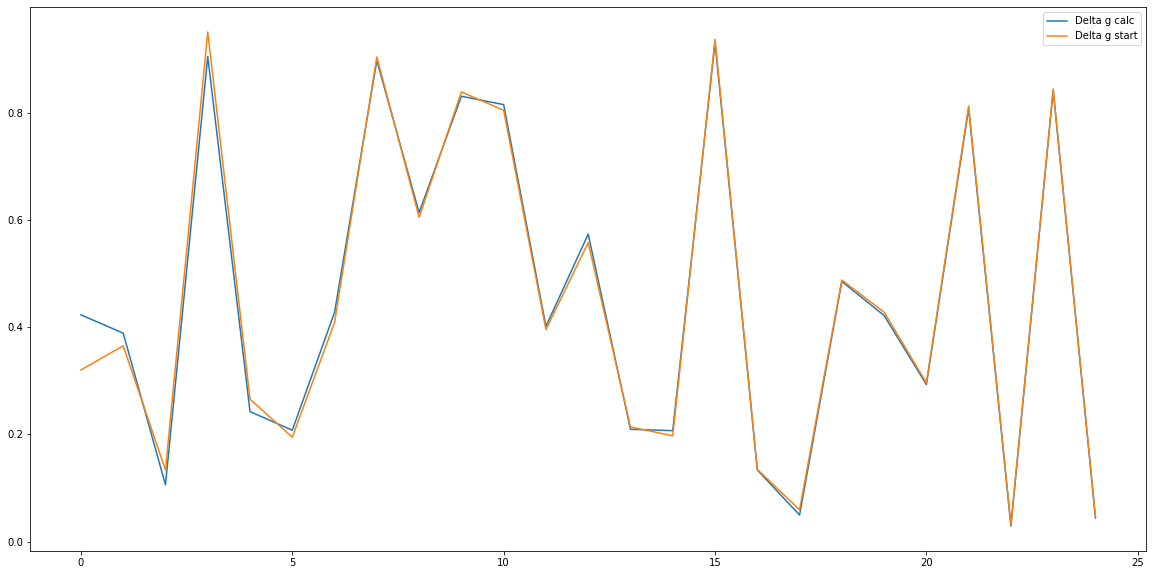

In [8]:
n = 1
m = 25
s = SLAE(n,m,np.random.rand(m,1))#np.array([[1],[1],[1]]))

#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
print("SIGMA: \n",s.Line(s.sigma))
print("DELTA G: \n", s.Line(s.deltaG))
print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

## Проблемы обратной матрицы и LU разложения

Из-за того как хранятся данные, существует погрешность при нахождении обратной матрицы, в следствии решение является (очень)не точным и не устойчивым, при квадратной моделе.

Так же так как при нахождении обратной матрицы используется \\(LU\\) разложение, временная сложность алгоритма равна \\(O(n^3)\\).

Приемлимый результат получается при нахождении плотности 1 линии, что показанно на графике выше. На графике ниже показан пример вычислений для плотностной модели с 2 линиями.


INV: det = 0


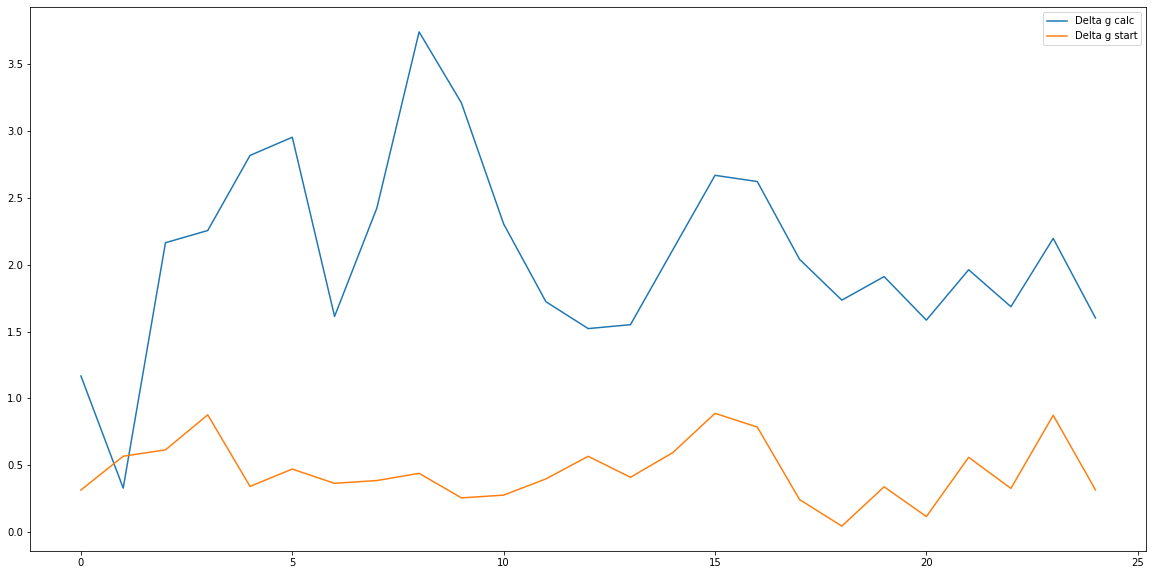

In [9]:
n = 2
m = 25
s = SLAE(n,m,np.random.rand(m,1))#np.array([[1],[1],[1]]))

#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
#print("SIGMA: \n",s.Line(s.sigma))
#print("DELTA G: \n", s.Line(s.deltaG))
#print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()

## Метод градиентного спуска

Метод градиентного спуска - численный метод нахождения локального экстремума функции. Данный метод итерационный, то есть модель подбирается пошагово.

Градиент функционала - вектор, направленный в сторону наискорейшего возрастания функции.

На каждой итерации расчитывается градиент функционала невязки для текущего приближения модели:

$$ \nabla L_i = 2A^T(A\sigma_i - \Delta g) + 2c(\sigma_i - \sigma_A)$$

, где \\(c\\) - параметр регуляризации, \\(\sigma_A\\) - априорные данные.

Модель смещается в сторону антиградиента, то есть противоположно направлению возрастания невязки:

$$ \sigma_{i+1} = \sigma_i - \alpha\nabla L_i$$

, где \\(\alpha\\) - маштабный коэфицент(величина шага).

## Класс модели основаной на методе градиентного спуска

In [10]:
class GRAD:
    def __init__(self, n, m, deltaG, iteration):
        self.n = n
        self.m = m
        self.iteration = iteration
        self.A = Matrix(self.CreateA())
        self.deltaG =  Matrix(deltaG)
        self.sigma = self.CalcSigma()
        self.newDeltaG = self.A * self.sigma
    
    def CreateA(self):
        A = np.zeros((self.m, self.n*self.m))
        for k in np.arange(self.m):
            xi = k
            zi = 1
            for z in np.arange(self.n):
                for x in np.arange(self.m):
                    r = sqrt((zi+z)**2+(x-xi)**2)
                    A[k][x+((z-1)*self.m)] = G*((zi+z)/(r**3))
        return A
    
    def gradient(self, sigma):
        return ((self.A + self.A).transpose()) * ((self.A * sigma) - self.deltaG)
    
    def CalcSigma(self):
        sigma  = Matrix(np.ones((self.m*self.n, 1)))
        a = 10**(19) + 0.001
        for i in np.arange(self.iteration):
            sigma =  sigma - self.gradient(sigma).mul(a)
            
        return sigma
    
    def Line(self, row):
        line = np.zeros(len(row.arr))
        for i in np.arange(len(row.arr)):
            line[i] = row.arr[i][0]
        return line

DELTA G: 
 [0.77510531 0.23249867 0.9610935  0.57107113 0.58059764 0.66206515
 0.71286975 0.07418586 0.17256252 0.28982431]
CALCULATED DELTA G: 
 [0.75425079 0.2691652  0.92450969 0.59836707 0.56251521 0.67682208
 0.69793737 0.08790839 0.16315421 0.29381745]


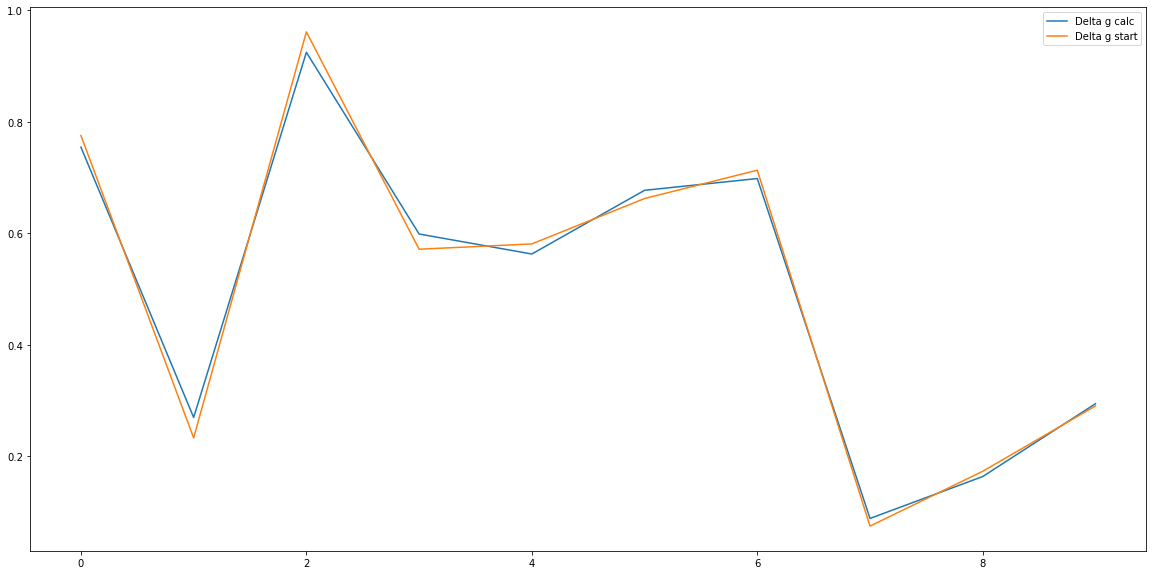

In [11]:
n = 10
m = 10
s = GRAD(n,m,np.random.rand(m,1),100)#np.array([[1],[1],[1]]))

#print("A: \n",s.A.arr)
#print("A * AT: \n", (s.A.transpose() * s.A).arr)
#print("INVERSE: \n",(~(s.A.transpose() * s.A)).arr)
#print("SIGMA: \n",s.Line(s.sigma))
print("DELTA G: \n", s.Line(s.deltaG))
print("CALCULATED DELTA G: \n", s.Line(s.newDeltaG))
#print("L true: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.deltaG)).arr)
#print("L false: \n",((s.A + s.A).transpose() * ((s.A * s.sigma) - s.newDeltaG)).arr)

plt.figure(figsize=(20, 10))
p1, = plt.plot(np.arange(s.m),s.Line(s.newDeltaG))
p2, = plt.plot(np.arange(s.m),s.Line(s.deltaG))
plt.legend([p1,p2],['Delta g calc','Delta g start'])
plt.show()